# Librerías necesarias

In [1]:
!pip install --upgrade gensim
!pip install pyLDAvis
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
orbax-chec

In [2]:
import pandas as pd
import numpy as np

In [3]:
import random
import gensim
from gensim.utils import simple_preprocess

from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt

# Ejemplo con Reviews de Asistentes Virtuales

# Lectura de datos

In [4]:
df = pd.read_csv('./reviews_sample.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,flags,utterance,category,intent
0,BILC,"I don't have an online account, what do I have...",ACCOUNT,create_account
1,BILQZ,can you tell me if i can regisger two accounts...,ACCOUNT,create_account
2,BPLC,"I have no online account, open one, please",ACCOUNT,create_account
3,BIPLD,"could you ask an agent how to open an account,...",ACCOUNT,create_account
4,BLQC,"i want an online account, create one",ACCOUNT,create_account


In [6]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(21534, 4)

In [7]:
df = df[['utterance']]
df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-3c053fe5541d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


# Preprocesado

Lo hacemos con Gensim por "presentarlo", pero sabéis que opciones hay infinitas

In [8]:
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print('Original text:\n{}\n\n'.format(df['utterance'][0]))
print('Processed text:\n{}'.format(text_preprocessing(df['utterance'][0])))

Original text:
I don't have an online account, what do I have to do to register?


Processed text:
['online', 'account', 'register']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
processed_texts = []
for text in df['utterance']:
    processed_texts.append(text_preprocessing(text))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
processed_texts[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['online', 'account', 'register'],
 ['tell', 'regisger', 'accounts', 'single', 'email', 'address'],
 ['online', 'account', 'open'],
 ['agent', 'open', 'account'],
 ['want', 'online', 'account', 'create'],
 ['want', 'account', 'need', 'help', 'opening'],
 ['tell', 'register', 'online', 'accounts', 'email'],
 ['want', 'know', 'create', 'profiles', 'email', 'address'],
 ['tell', 'create', 'fucking', 'user', 'account', 'email'],
 ['create', 'onlind', 'account']]

## Diccionario id - palabra

In [12]:
dictionary = Dictionary(processed_texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
type(dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.corpora.dictionary.Dictionary

In [14]:
list(dictionary.items())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 'account'),
 (1, 'online'),
 (2, 'register'),
 (3, 'accounts'),
 (4, 'address'),
 (5, 'email'),
 (6, 'regisger'),
 (7, 'single'),
 (8, 'tell'),
 (9, 'open'),
 (10, 'agent'),
 (11, 'create'),
 (12, 'want'),
 (13, 'help'),
 (14, 'need'),
 (15, 'opening'),
 (16, 'know'),
 (17, 'profiles'),
 (18, 'fucking'),
 (19, 'user'),
 (20, 'onlind'),
 (21, 'wanna'),
 (22, 'creae'),
 (23, 'profile'),
 (24, 'creating'),
 (25, 'haven'),
 (26, 'registering'),
 (27, 'like'),
 (28, 'knoe'),
 (29, 'dont'),
 (30, 'profille'),
 (31, 'watn'),
 (32, 'auser'),
 (33, 'oneuser'),
 (34, 'accolunt'),
 (35, 'nkow'),
 (36, 'havent'),
 (37, 'cani'),
 (38, 'accoung'),
 (39, 'creaet'),
 (40, 'creage'),
 (41, 'opem'),
 (42, 'oculd'),
 (43, 'wantto'),
 (44, 'createone'),
 (45, 'cvan'),
 (46, 'regitser'),
 (47, 'rehister'),
 (48, 'haveto'),
 (49, 'suer'),
 (50, 'haev'),
 (51, 'eith'),
 (52, 'knwo'),
 (53, 'hace'),
 (54, 'wannaopen'),
 (55, 'accountg'),
 (56, 'zccount'),
 (57, 'needx'),
 (58, 'oyuy'),
 (59, 'rceate'),
 

In [15]:
len(dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1663

## Matriz documento-palabra

In [16]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 1), (1, 1), (9, 1)],
 [(0, 1), (9, 1), (10, 1)],
 [(0, 1), (1, 1), (11, 1), (12, 1)],
 [(0, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (8, 1)],
 [(4, 1), (5, 1), (11, 1), (12, 1), (16, 1), (17, 1)],
 [(0, 1), (5, 1), (8, 1), (11, 1), (18, 1), (19, 1)],
 [(0, 1), (11, 1), (20, 1)],
 [(0, 1), (4, 1), (5, 1), (7, 1), (11, 1), (16, 1), (19, 1), (21, 1)],
 [(1, 1), (3, 1), (5, 1), (7, 1), (11, 1)],
 [(0, 1), (11, 1), (19, 1)],
 [(0, 1), (11, 1), (19, 1)],
 [(3, 1), (12, 1), (16, 1)],
 [(22, 1), (23, 1)],
 [(0, 1), (1, 1), (13, 1), (14, 1), (24, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (12, 1), (16, 1), (19, 1)],
 [(0, 1), (9, 1), (12, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (7, 1), (8, 1), (19, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1)],
 [(0, 1), (2, 1), (19, 1), (25, 1)],
 [(0, 1), (11, 1), (12, 1), (14, 1), (19, 1)],
 [(0, 1), (1, 1), (9, 1), (14, 1)],
 [(11, 1), (23, 1)],
 [(2

In [18]:
corpus[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1)]

In [19]:
corpus[5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (12, 1), (13, 1), (14, 1), (15, 1)]

## Entrenamos el modelo (LDA)

In [28]:
num_topics = 3

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
lda_model.show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.126*"want" + 0.079*"refund" + 0.078*"reimbursement" + 0.044*"tell" + 0.040*"obtain" + 0.040*"request" + 0.034*"cancelled" + 0.034*"postponed" + 0.031*"status" + 0.030*"check"'),
 (1,
  '0.143*"agent" + 0.128*"help" + 0.065*"need" + 0.050*"making" + 0.049*"fucking" + 0.043*"information" + 0.028*"account" + 0.027*"issues" + 0.027*"problems" + 0.026*"purchase"'),
 (2,
  '0.120*"payment" + 0.064*"error" + 0.054*"problem" + 0.054*"issue" + 0.050*"inform" + 0.050*"notify" + 0.050*"card" + 0.050*"report" + 0.047*"order" + 0.042*"charged"')]

In [30]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic #01,Topic #02,Topic #03
0,want,agent,payment
1,refund,help,error
2,reimbursement,need,problem
3,tell,making,issue
4,obtain,fucking,inform
5,request,information,notify
6,cancelled,account,card
7,postponed,issues,report
8,status,problems,order
9,check,purchase,charged


## Perplexity y Coherence

In [31]:
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -4.996608012018025

Coherence Score:  0.4238171491657285


In [32]:
# Visualizar los topics
#!pip install pandas==1.5.3
pyLDAvis.enable_notebook ()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.361744  0.017366       1        1  34.601929
2      0.163414 -0.278560       2        1  33.290179
1      0.198330  0.261194       3        1  32.107892, topic_info=         Term         Freq        Total Category  logprob  loglift
10      agent  3800.000000  3800.000000  Default  30.0000  30.0000
13       help  3405.000000  3405.000000  Default  29.0000  29.0000
12       want  3609.000000  3609.000000  Default  28.0000  28.0000
1231  payment  3666.000000  3666.000000  Default  27.0000  27.0000
1496   refund  2264.000000  2264.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
297    update   109.548942   113.726589   Topic3  -5.4945   1.0986
648   helping   183.846449   225.843111   Topic3  -4.9768   0.9303
1053    order   324.378763  1660.096071   Topic3  -4.4090  -0.4967
1231  payment   347.818309  3666.305927   Topic3  -4.3392  -1.2192
1260   paying   191.817568  1250.002870   Topic3  -4.9344  -0.7383

[164 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.024903  account
0         2  0.079454  account
0         3  0.895335  account
4         1  0.997471  address
4         3  0.001238  address
...     ...       ...      ...
21        2  0.499604    wanna
21        3  0.002569    wanna
12        1  0.999174     want
12        2  0.000554     want
12        3  0.000277     want

[290 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [33]:
pyLDAvis.save_html(vis, './topics_vis_0.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Número óptimo de topics

In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):

        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)

        # Create a list of LDA models
        model_list.append(model)

        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grid sobre el número de topics (puede tardar un buen rato)

In [35]:
start_ = 3
end_ = 14
step_ = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


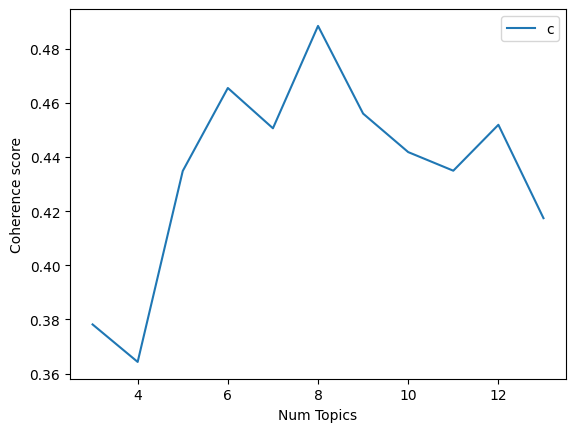

In [37]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [39]:
optimal_model_id = -1

optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(0, optimal_model.num_topics , 1):
    words = optimal_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13
0,register,order,need,fucking,tell,help,agent,want,account,address,service,payment,know
1,account,information,account,wanna,service,card,check,reimbursement,dont,email,mail,error,track
2,user,change,cani,like,track,need,view,refund,user,want,address,problem,want
3,email,want,help,solve,number,making,status,obtain,mind,send,customer,issue,wanna
4,tell,agent,online,issues,customer,charged,service,request,asking,haev,tell,inform,service
5,address,purchase,user,payment,free,payment,delivery,postponed,want,tell,whats,notify,package
6,single,modify,open,order,phone,problems,options,cancelled,hacked,shipping,client,report,packages
7,accounts,status,want,agent,contact,attempted,contact,status,help,wanna,support,paying,shipment
8,create,cancel,creating,status,support,tried,talk,check,wanna,accounts,contact,trying,orders
9,acocunt,profile,hepl,tell,client,issues,speak,receive,open,know,want,message,shipments


# Topic dominante por texto

In [40]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df,
                    pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]).to_frame().T],
                    ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.6057,"need, account, cani, help, online, user, open,...","[online, account, register]"
1,1,9,0.674,"address, email, want, send, haev, tell, shippi...","[tell, regisger, accounts, single, email, addr..."
2,2,2,0.7692,"need, account, cani, help, online, user, open,...","[online, account, open]"
3,3,2,0.5192,"need, account, cani, help, online, user, open,...","[agent, open, account]"
4,4,2,0.6506,"need, account, cani, help, online, user, open,...","[want, online, account, create]"
5,5,2,0.8461,"need, account, cani, help, online, user, open,...","[want, account, need, help, opening]"
6,6,9,0.6619,"address, email, want, send, haev, tell, shippi...","[tell, register, online, accounts, email]"
7,7,9,0.577,"address, email, want, send, haev, tell, shippi...","[want, know, create, profiles, email, address]"
8,8,8,0.3472,"account, dont, user, mind, asking, want, hacke...","[tell, create, fucking, user, account, email]"
9,9,2,0.736,"need, account, cani, help, online, user, open,...","[create, onlind, account]"


# Documento más representativo por topic

In [42]:
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([
        sent_topics_sorteddf_lda,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],
        axis=0)

# Reset Index
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.5567,"register, account, user, email, tell, address,...","[foundproblems, triyng, register]"
1,1,0.8355,"order, information, change, want, agent, purch...","[ordered, product, want, change, purchase]"
2,2,0.8681,"need, account, cani, help, online, user, open,...","[haven, user, account, need, help, opening]"
3,3,0.8154,"fucking, wanna, like, solve, issues, payment, ...","[like, solve, payment, issues]"
4,4,0.8846,"tell, service, track, number, customer, free, ...","[tell, free, phone, number, contact, customer,..."
5,5,0.8846,"help, card, need, making, charged, payment, pr...","[issue, making, payment, card, need, help, rep..."
6,6,0.8462,"agent, check, view, status, service, delivery,...","[agent, view, options, ticket, delivery]"
7,7,0.8462,"want, reimbursement, refund, obtain, request, ...","[concert, cancelled, want, request, refund]"
8,8,0.8462,"account, dont, user, mind, asking, want, hacke...","[dont, user, account, want, open]"
9,9,0.8847,"address, email, want, send, haev, tell, shippi...","[want, knmow, register, online, accounts, sing..."


# Distribución de topics en el corpus

In [43]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,contribution
0,11,0.159
1,6,0.133
2,7,0.115
3,5,0.110
4,10,0.097
5,1,0.092
6,12,0.058
7,2,0.057
8,8,0.053
9,9,0.044
